Tips data analysis by Classification tools

In [1]:
from sklearn.metrics import *

In [2]:
%matplotlib inline
tips=sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [3]:
tips['sex'] = tips['sex'].apply(lambda x: 1 if x == 'Male' else 0).astype('int64')
tips['smoker'] = tips['smoker'].apply(lambda x: 1 if x == 'Yes' else 0).astype('int64')
tips['time'] = tips['time'].apply(lambda x: 1 if x == 'Dinner' else 0).astype('int64')
tips['day'] = tips['day'].apply(lambda x: 0 if x == 'Thur' else 1 if x =='Fri' else 2 if x=='Sat' else 3).astype('int64')

In [4]:
tips.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.725410,0.721311,2.569672
std,8.902412,1.383638,0.479967,0.486667,1.155774,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [5]:
tips['upper3'] = tips['tip'].apply(lambda x: 1 if x >=3 else 0)
tips['upper5'] = tips['tip'].apply(lambda x: 1 if x >5 else 0)
tips['target'] = tips['tip'].apply(lambda x: 'upper5' if x>5 else 'upper3' if x>3 else 'others')

In [6]:
X =tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips['target']

---

# logistic

In [7]:
model5 = sm.Logit.from_formula("upper5 ~ total_bill + sex + smoker + day + time + size", tips)
result5 = model5.fit(disp=0)

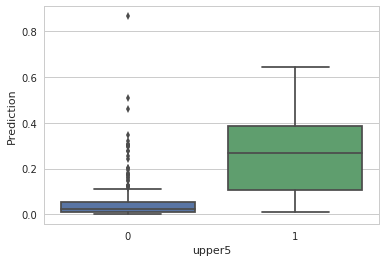

In [8]:
tips["Prediction"] = result5.predict(tips)
sns.boxplot(x="upper5", y="Prediction", data=tips)
plt.show()

### 10% 확률만 있어도 부자로 체크!

부자를 찾아낼 확률이 올라간다! 물론 False Positive도 오른다.

In [9]:
y5 = tips['upper5']
y_pred = result5.predict(X).apply(lambda x: 1 if x >=0.1 else 0)
print("accuracy score", accuracy_score(y5, y_pred),)
print("recall score", recall_score(y5, y_pred), "\n")

print("Confusion Matrix:\n\n",confusion_matrix(y5, y_pred), "\n")
target_names = ['others', 'upper5']
print("Classification report:\n\n",classification_report(y5, y_pred, target_names=target_names))

accuracy score 0.8360655737704918
recall score 0.7777777777777778 

Confusion Matrix:

 [[190  36]
 [  4  14]] 

Classification report:

              precision    recall  f1-score   support

     others       0.98      0.84      0.90       226
     upper5       0.28      0.78      0.41        18

avg / total       0.93      0.84      0.87       244



AUC : 0.8092428711897738


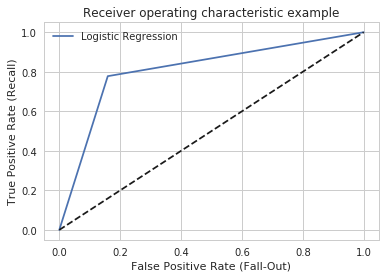

In [10]:
fpr5, tpr5, thresholds5 = roc_curve(y5, y_pred)

plt.plot(fpr5, tpr5, label="Logistic Regression")

plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
print ("AUC :",auc(fpr5, tpr5))
plt.show()

---

### QDA LDA

In [11]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() # 객체 생성
y = tips['target']
y1 = lb.fit_transform(tips['target'])

In [12]:
from sklearn.discriminant_analysis import *
qda = QuadraticDiscriminantAnalysis().fit(X, y)
lda = LinearDiscriminantAnalysis(n_components=3, solver="svd").fit(X, y)

y_pred = qda.predict(X)
y_pred2 = lda.predict(X)

print("QDA confusion_matrix \n\n",confusion_matrix(y, y_pred),"\n\n")
print("LDA confusion_matrix \n\n",confusion_matrix(y, y_pred2),"\n\n")

target_names = ['others', 'upper3','upper5']
print("QDA",classification_report(y, y_pred, target_names=target_names))
print("LDA",classification_report(y, y_pred2, target_names=target_names))


QDA confusion_matrix 

 [[126  19   1]
 [ 44  33   3]
 [  3   9   6]] 


LDA confusion_matrix 

 [[132  13   1]
 [ 47  26   7]
 [  2  11   5]] 


QDA              precision    recall  f1-score   support

     others       0.73      0.86      0.79       146
     upper3       0.54      0.41      0.47        80
     upper5       0.60      0.33      0.43        18

avg / total       0.66      0.68      0.66       244

LDA              precision    recall  f1-score   support

     others       0.73      0.90      0.81       146
     upper3       0.52      0.33      0.40        80
     upper5       0.38      0.28      0.32        18

avg / total       0.64      0.67      0.64       244



In [13]:
from sklearn.multiclass import OneVsRestClassifier
model1 = OneVsRestClassifier(QuadraticDiscriminantAnalysis()).fit(X, y)
model2 = OneVsRestClassifier(LinearDiscriminantAnalysis(n_components=3, 
                                 solver="svd", store_covariance=True)).fit(X, y)

auc: 0.8066116857701984
auc: 0.7458079268292683
auc: 0.9164208456243854


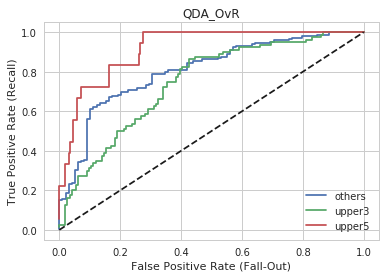

In [14]:
fpr1, tpr1, thresholds1 =roc_curve(y1[:,0], model1.decision_function(X)[:,0])
fpr2, tpr2, thresholds2 =roc_curve(y1[:,1], model1.decision_function(X)[:,1])
fpr3, tpr3, thresholds3 =roc_curve(y1[:,2], model1.decision_function(X)[:,2])

plt.plot(fpr1, tpr1, label="others")
plt.plot(fpr2, tpr2, label="upper3")
plt.plot(fpr3, tpr3, label="upper5")

plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('QDA_OvR')
print ("auc:",auc(fpr1, tpr1))
print ("auc:",auc(fpr2, tpr2))
print ("auc:",auc(fpr3, tpr3))

plt.show()

auc: 0.8171652222532848
auc: 0.7314024390243903
auc: 0.8581612586037364


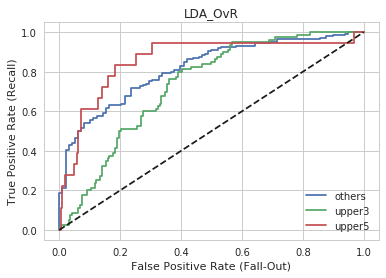

In [15]:
fpr1, tpr1, thresholds1 =roc_curve(y1[:,0], model2.decision_function(X)[:,0])
fpr2, tpr2, thresholds2 =roc_curve(y1[:,1], model2.decision_function(X)[:,1])
fpr3, tpr3, thresholds3 =roc_curve(y1[:,2], model2.decision_function(X)[:,2])

plt.plot(fpr1, tpr1, label="others")
plt.plot(fpr2, tpr2, label="upper3")
plt.plot(fpr3, tpr3, label="upper5")

plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('LDA_OvR')
print ("auc:",auc(fpr1, tpr1))
print ("auc:",auc(fpr2, tpr2))
print ("auc:",auc(fpr3, tpr3))

plt.show()

---

## Naive bayesan
- sex, smoker, time -> Bin
- totalbill, - gaussan
- size - MNB

In [16]:
y = tips['upper5']

In [17]:
from sklearn.naive_bayes import *

model_g = GaussianNB().fit(X, y)
model_bern = BernoulliNB().fit(X, y)
model_mult = MultinomialNB().fit(X, y)

In [18]:
g = model_g.predict_proba(X)/model_g.class_prior_
bern = np.exp(model_bern.predict_log_proba(X))/model_g.class_prior_
mult = np.exp(model_mult.predict_log_proba(X))/model_g.class_prior_

posterior = g*bern*mult*model_g.class_prior_

In [19]:
def mk(posterior):
    result = []
    for a, b in posterior:
        if a>b: result.append(0)
        else: result.append(1)
    a = pd.Series(result)
    return a

In [20]:
y_pred = mk(posterior)

In [21]:
print("accuracy: ", accuracy_score(y, y_pred))
print("recall: ", recall_score(y, y_pred))

accuracy:  0.8975409836065574
recall:  0.5555555555555556


----

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=X.columns)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

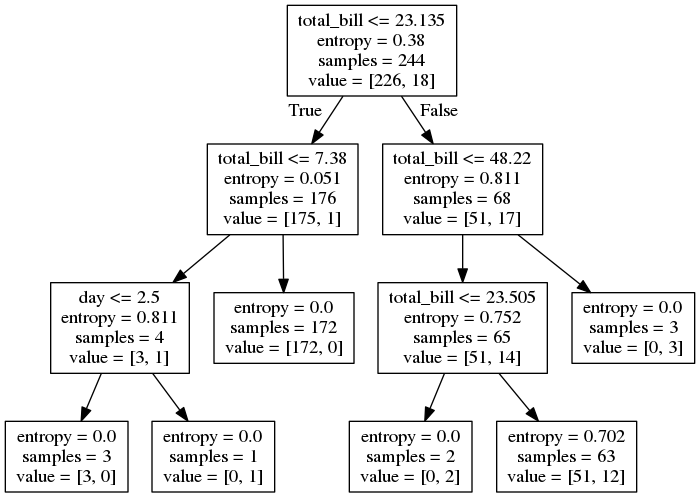

In [23]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)
draw_decision_tree(tree3)

In [24]:
confusion_matrix(y, tree3.predict(X))

array([[226,   0],
       [ 12,   6]])

In [25]:
from sklearn.model_selection import *

cv = KFold(5)

for i in range(1,10):
    tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=i).fit(X, y)
    print("{}".format(i), cross_val_score(tree1, X, y, scoring="recall", cv=cv).mean())

1 0.0
2 0.0
3 0.04
4 0.13999999999999999
5 0.3
6 0.2833333333333333
7 0.4333333333333333
8 0.4333333333333333
9 0.36666666666666664


In [26]:
for i in range(1,10):
    tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=i).fit(X, y)
    print("{}".format(i), cross_val_score(tree1, X, y, scoring="accuracy", cv=cv).mean())

1 0.9261904761904762
2 0.9261904761904762
3 0.922108843537415
4 0.922108843537415
5 0.9221938775510203
6 0.9098639455782314
7 0.9181122448979592
8 0.9058673469387756
9 0.914030612244898


---

## Model combining

## 다수결

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], 
                            voting='soft', weights=[1, 1, 3])

In [28]:
ensem = ensemble.fit(X, y)

In [29]:
print(cross_val_score(ensem, X, y, scoring="accuracy", cv=cv).mean())
print(cross_val_score(ensem, X, y, scoring="recall", cv=cv).mean())

0.9098639455782314
0.4133333333333333


/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

## 배깅

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier


model1 = DecisionTreeClassifier().fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(), bootstrap_features=True, random_state=0).fit(X, y)

y_pred = model1.predict(X)
print("accuracy: ", accuracy_score(y, y_pred))
print("recall: ", recall_score(y, y_pred), "- Overfitting")
y_pred = model2.predict(X)
print("accuracy: ", accuracy_score(y, y_pred))
print("recall: ", recall_score(y, y_pred))

accuracy:  1.0
recall:  1.0 - Overfitting
accuracy:  0.9754098360655737
recall:  0.6666666666666666


## 랜덤 포레스트 

In [31]:
from sklearn.ensemble import *

DT = DecisionTreeClassifier(max_depth=4).fit(X, y)
forest = RandomForestClassifier(max_depth=4, n_estimators=250).fit(X, y)
Eforest = ExtraTreesClassifier(max_depth=4, n_estimators=250).fit(X, y)

print("DT: ",accuracy_score(y, DT.predict(X)))
print("recall: ", recall_score(y, DT.predict(X)))

print("\nF: ",accuracy_score(y, forest.predict(X)))
print("recall: ", recall_score(y, forest.predict(X)))

print("\nEF: ",accuracy_score(y,Eforest.predict(X)))
print("recall: ", recall_score(y, Eforest.predict(X)))

DT:  0.9713114754098361
recall:  0.7222222222222222

F:  0.9426229508196722
recall:  0.2222222222222222

EF:  0.930327868852459
recall:  0.05555555555555555


In [32]:
D = DT.feature_importances_
F = forest.feature_importances_
EF = Eforest.feature_importances_
print(tips.columns[:-4])
print('\n D:', D)
print('\n F:', F)
print('\n EF:', EF)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

 D: [0.63431952 0.06428065 0.17355776 0.         0.01213691 0.11570517]

 F: [0.61420498 0.03446703 0.0735551  0.05440474 0.01698344 0.2063847 ]

 EF: [0.4358534  0.04412807 0.07252468 0.08359739 0.02049663 0.34339983]


Feature ranking:
1. feature 0 (0.614205)
2. feature 5 (0.206385)
3. feature 2 (0.073555)
4. feature 3 (0.054405)
5. feature 1 (0.034467)
6. feature 4 (0.016983)


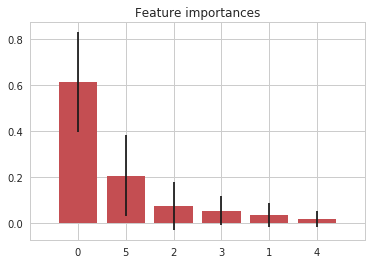

In [33]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(F)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], F[indices[f]]))

plt.title("Feature importances")
plt.bar(range(X.shape[1]), F[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()